# Linear Regression

Submission to "How to Make a Prediction - Intro to Deep Learning 1" by Siraj Raval on YouTube

In [92]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

## Regression with 2 variables

### 1. Import and visualize data

In [94]:
#df = pd.read_csv('challenge_dataset.txt', names=['X','Y'])
df_raw = pd.read_csv('occupancy_datatest2.csv')
df_X=df_raw[['Humidity']]
df_Y=df_raw[['HumidityRatio']]
df = pd.concat([df_X,df_Y],axis=1 )
#df.column = ['X','Y']
df = df.rename(columns={'Humidity': 'X', 'HumidityRatio': 'Y'})

#df.drop(['class',''],1,inplace=True)      

df.head()

#df = pd.read_csv('../../forest.csv') #Dataframe for training.csv
#df.drop(['class'],1,inplace=True)
#X_tot = df.values



,X,Y
1,27.2720,0.004793
2,27.2675,0.004783
3,27.2450,0.004779
4,27.2000,0.004772
5,27.2000,0.004757


### 2. 2D Regression

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['X'], df['Y'], test_size=0.1))

In [98]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))

Score:  0.8689810528557362


### 3. Plot regression and visualize results

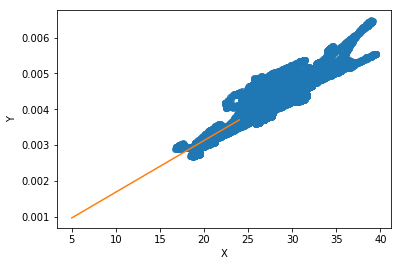

In [100]:
x_line = np.arange(5,25).reshape(-1,1)
sns.regplot(x=df['X'], y=df['Y'], data=df, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

## 3 Variables

### 1. Data preprocessing

In [101]:
# Import data
df_raw = pd.read_csv('occupancy_datatest.csv')
df_X=df_raw[['Humidity']]
df_Y=df_raw[['HumidityRatio']]
df_Z=df_raw[['CO2']]

df = pd.concat([df_X,df_Y,df_Z],axis=1 )
#df.column = ['X','Y']
df = df.rename(columns={'Humidity': 'X', 'HumidityRatio': 'Y', 'CO2': 'Z'})
df.head()

,X,Y,Z
1,27.2720,0.004793,721.25
2,27.2675,0.004783,714.00
3,27.2450,0.004779,713.50
4,27.2000,0.004772,708.25
5,27.2000,0.004757,704.50


### 2. Vizualize initial data

#### 3D Plot

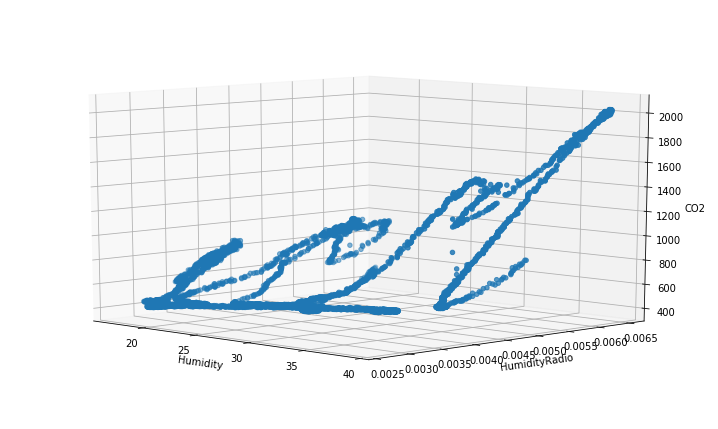

In [102]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df['X'], ys=df['Y'], zs=df['Z'])

ax.set_ylabel('HumidityRadio'); ax.set_xlabel('Humidity'); ax.set_zlabel('CO2')
ax.view_init(10, -45)

#### Projected 2D plots

Text(0,0.5,'Humidity Radio')

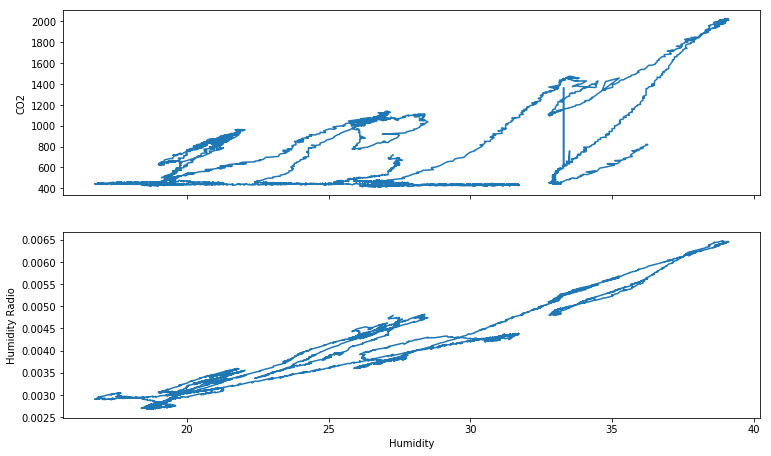

In [103]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(df['X'], df['Z'])
axarr[0].set_ylabel('CO2')
axarr[1].plot(df['X'], df['Y'])
axarr[1].set_xlabel('Humidity')
axarr[1].set_ylabel('Humidity Radio')

### 3. Linear Regression

In [91]:
X = df.as_matrix(['CO2'])
Y = df.as_matrix(['Humidity', 'HumidityRadio'])

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\gollo\Miniconda3\envs\tarea2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [90]:
reg = LinearRegression()
reg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [88]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

ValueError: shapes (2445,1) and (3,3) not aligned: 1 (dim 1) != 3 (dim 0)

### 4. Plot regression and visualize results

In [14]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

#### 3D Plot

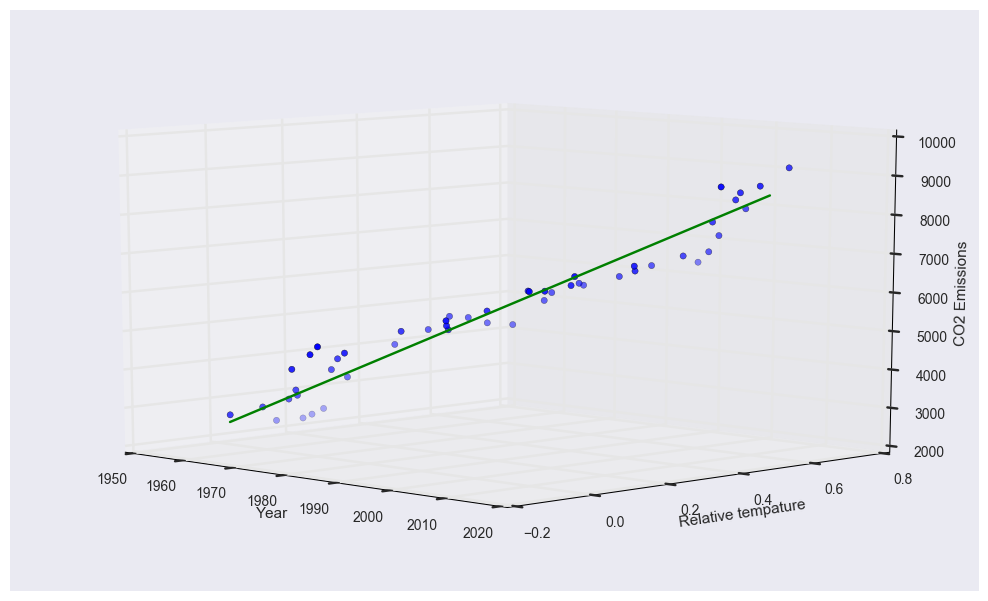

In [15]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)

#### Projected 2D plots

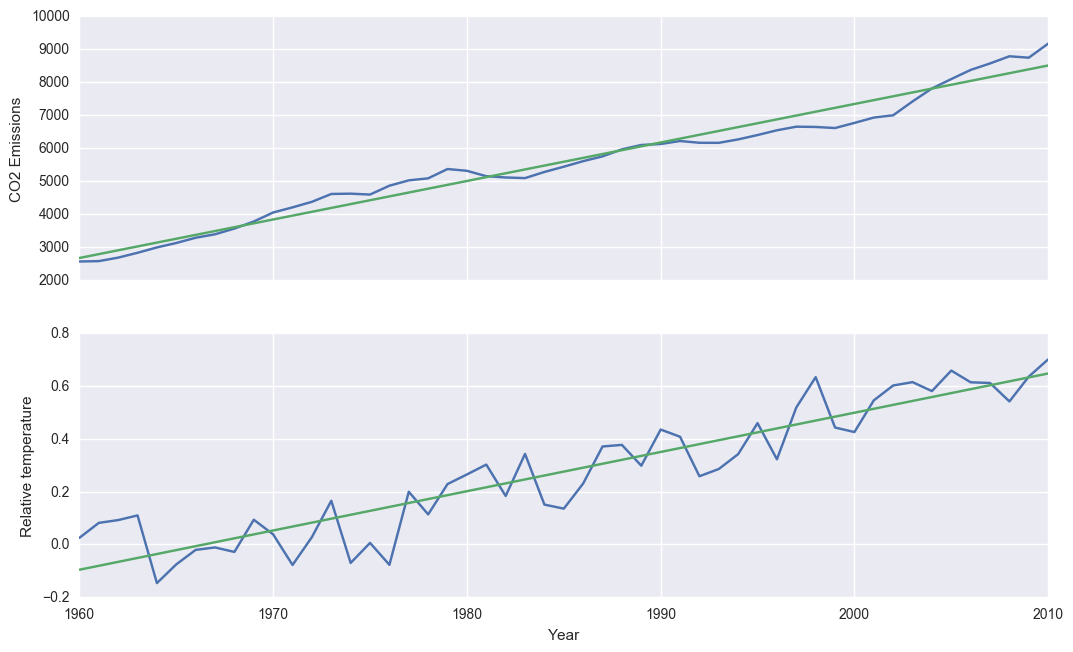

In [16]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')